# Missing Values in our dataset

In [23]:
import pandas as pd 
import numpy as np
import missingno as msno
from sklearn.impute import SimpleImputer # Imputer for handling missing values
import sqlite3

data = pd.read_csv("../data/raw/credit_risk_dataset.csv")

# General information about missing values
missing_values = data.isnull().sum()
print(missing_values)

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


<Axes: >

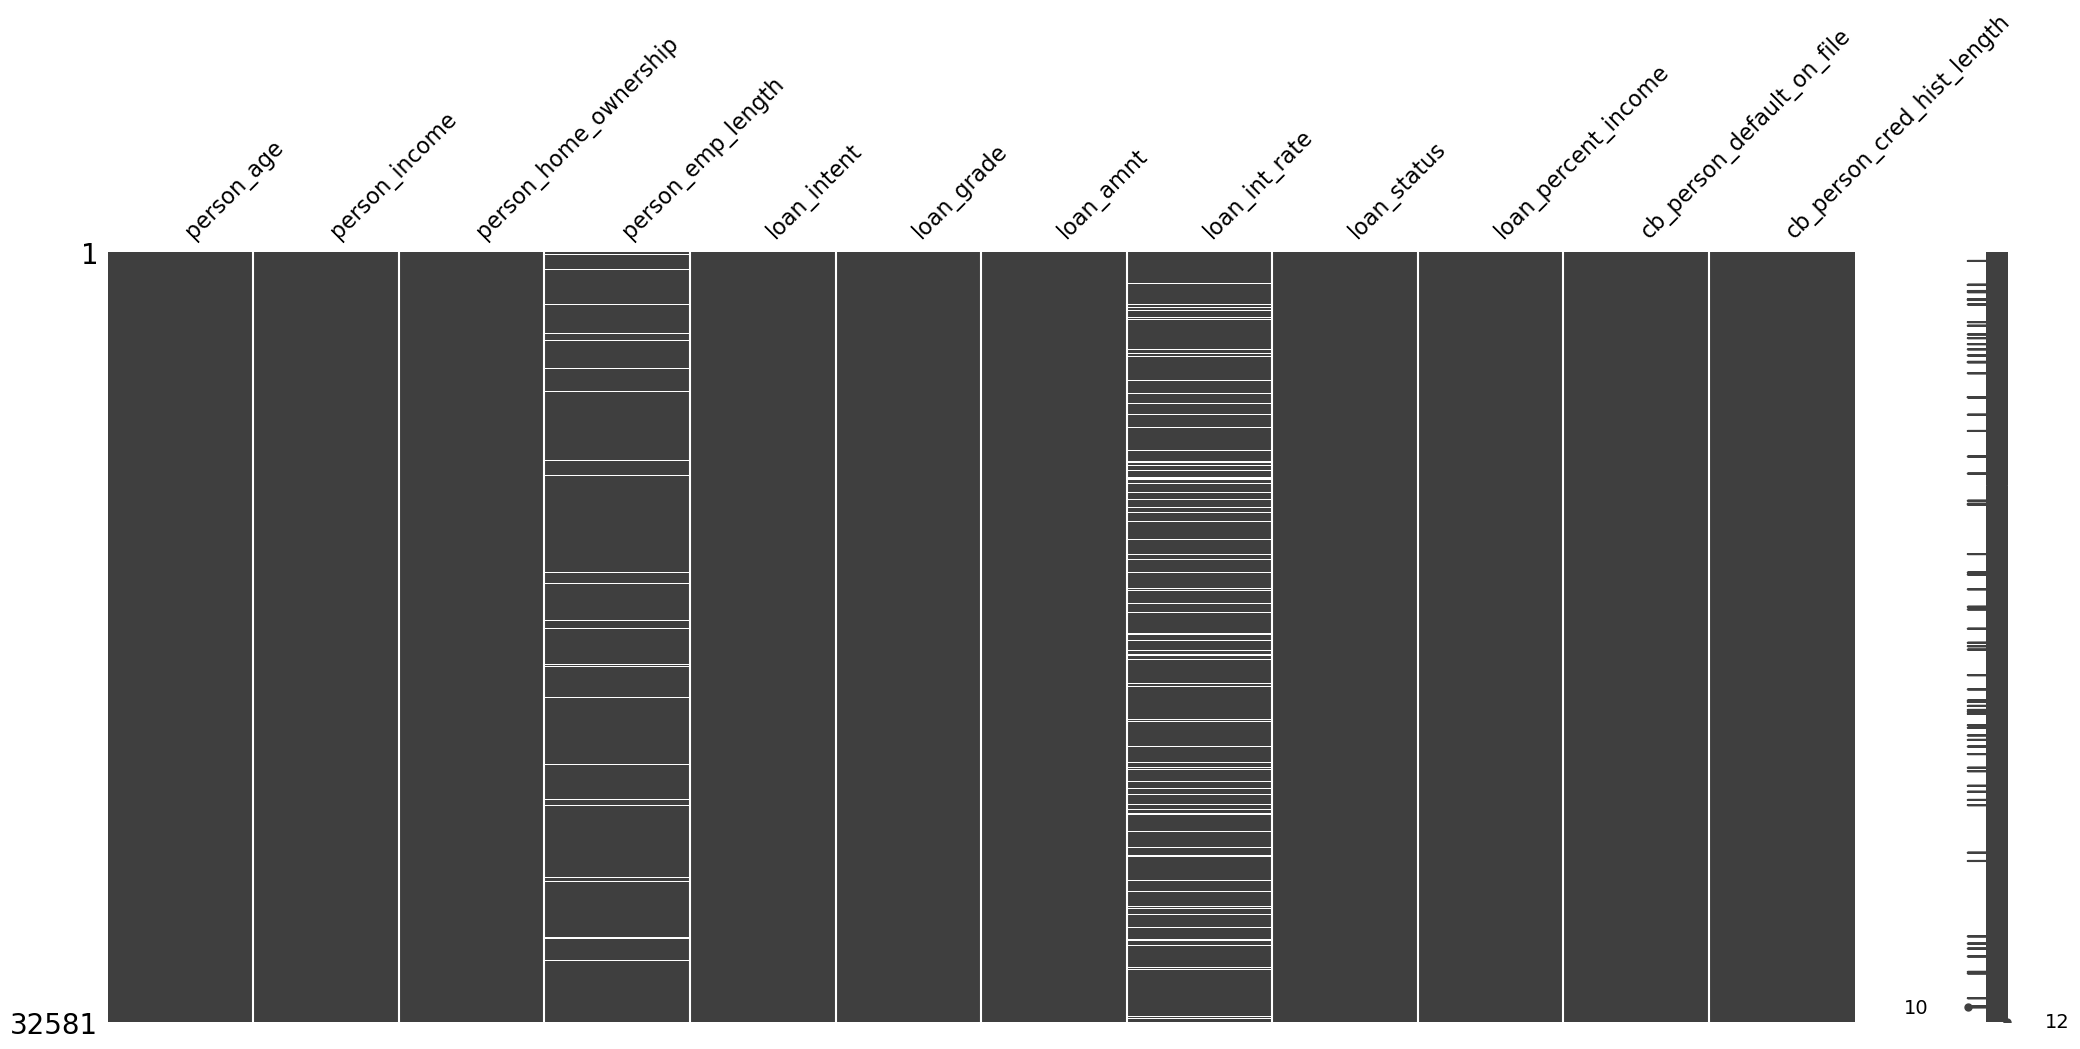

In [24]:
# Analysing the pattern of missing values
msno.matrix(data)


<Axes: >

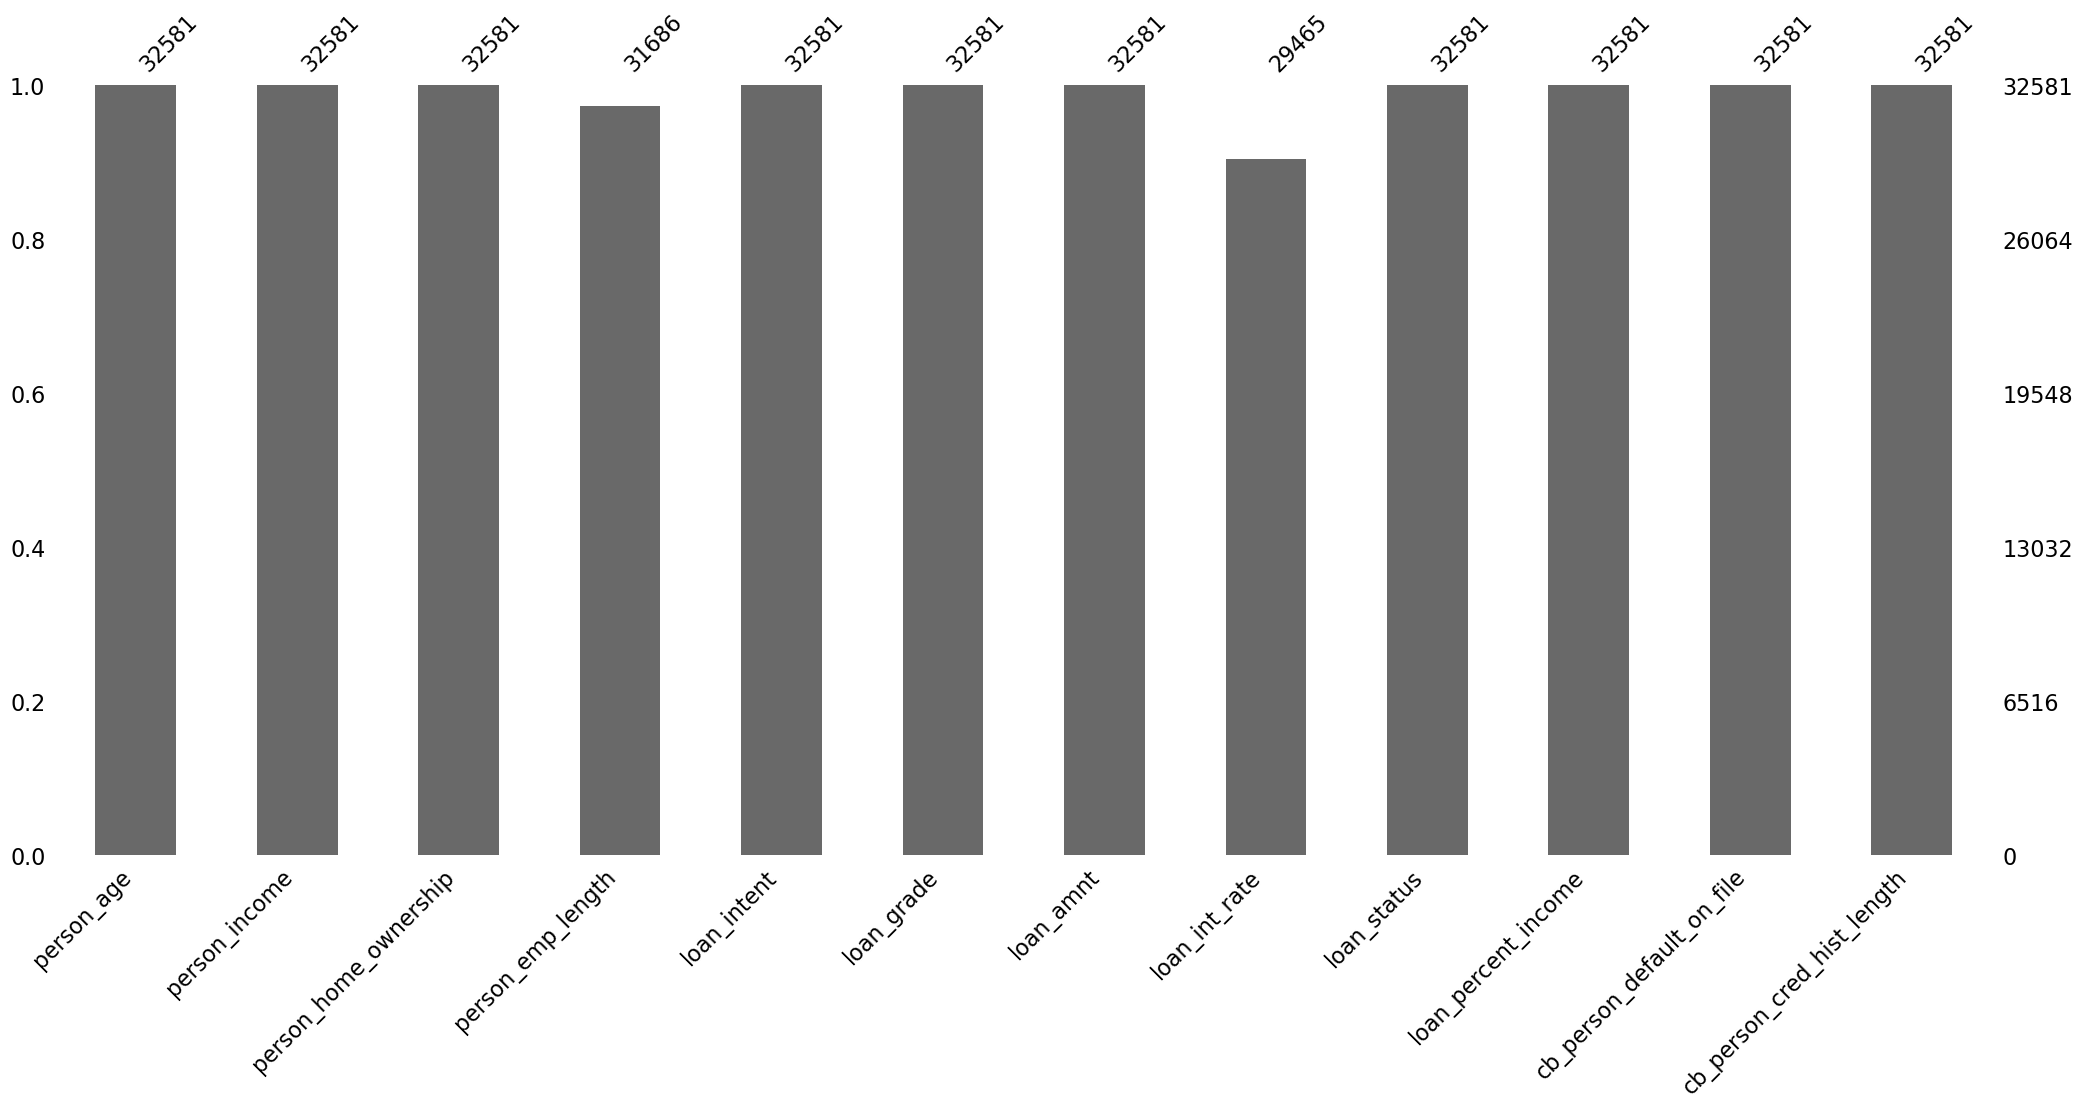

In [25]:
# Analysing the correlation of missing values
msno.bar(data)

### On this step it's required to drop columns with a high a high percentage of missing values (e.g., >50%). In our case there's no such columns so we have to fill missing values

In [26]:
# Next step is to fill missing values
# For numerical columns, it's a common strategy to fill missing values with the mean of the column so it will not influence the distribution of the data

# For categorical columns, it's a common strategy to fill missing values with the mode of the column. The mode is the value that appears most frequently in a dataset.

numerical_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
numerical_imputer = SimpleImputer(strategy='mean')
data[numerical_features] = numerical_imputer.fit_transform(data[numerical_features])
data[numerical_features].isnull().sum()

person_age                    0
person_income                 0
person_emp_length             0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_cred_hist_length    0
dtype: int64

In [27]:
# Next step is to fill missing values for categorical columns
categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
categorical_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_features] = categorical_imputer.fit_transform(data[categorical_features])
data[categorical_features].isnull().sum()

person_home_ownership        0
loan_intent                  0
loan_grade                   0
cb_person_default_on_file    0
dtype: int64

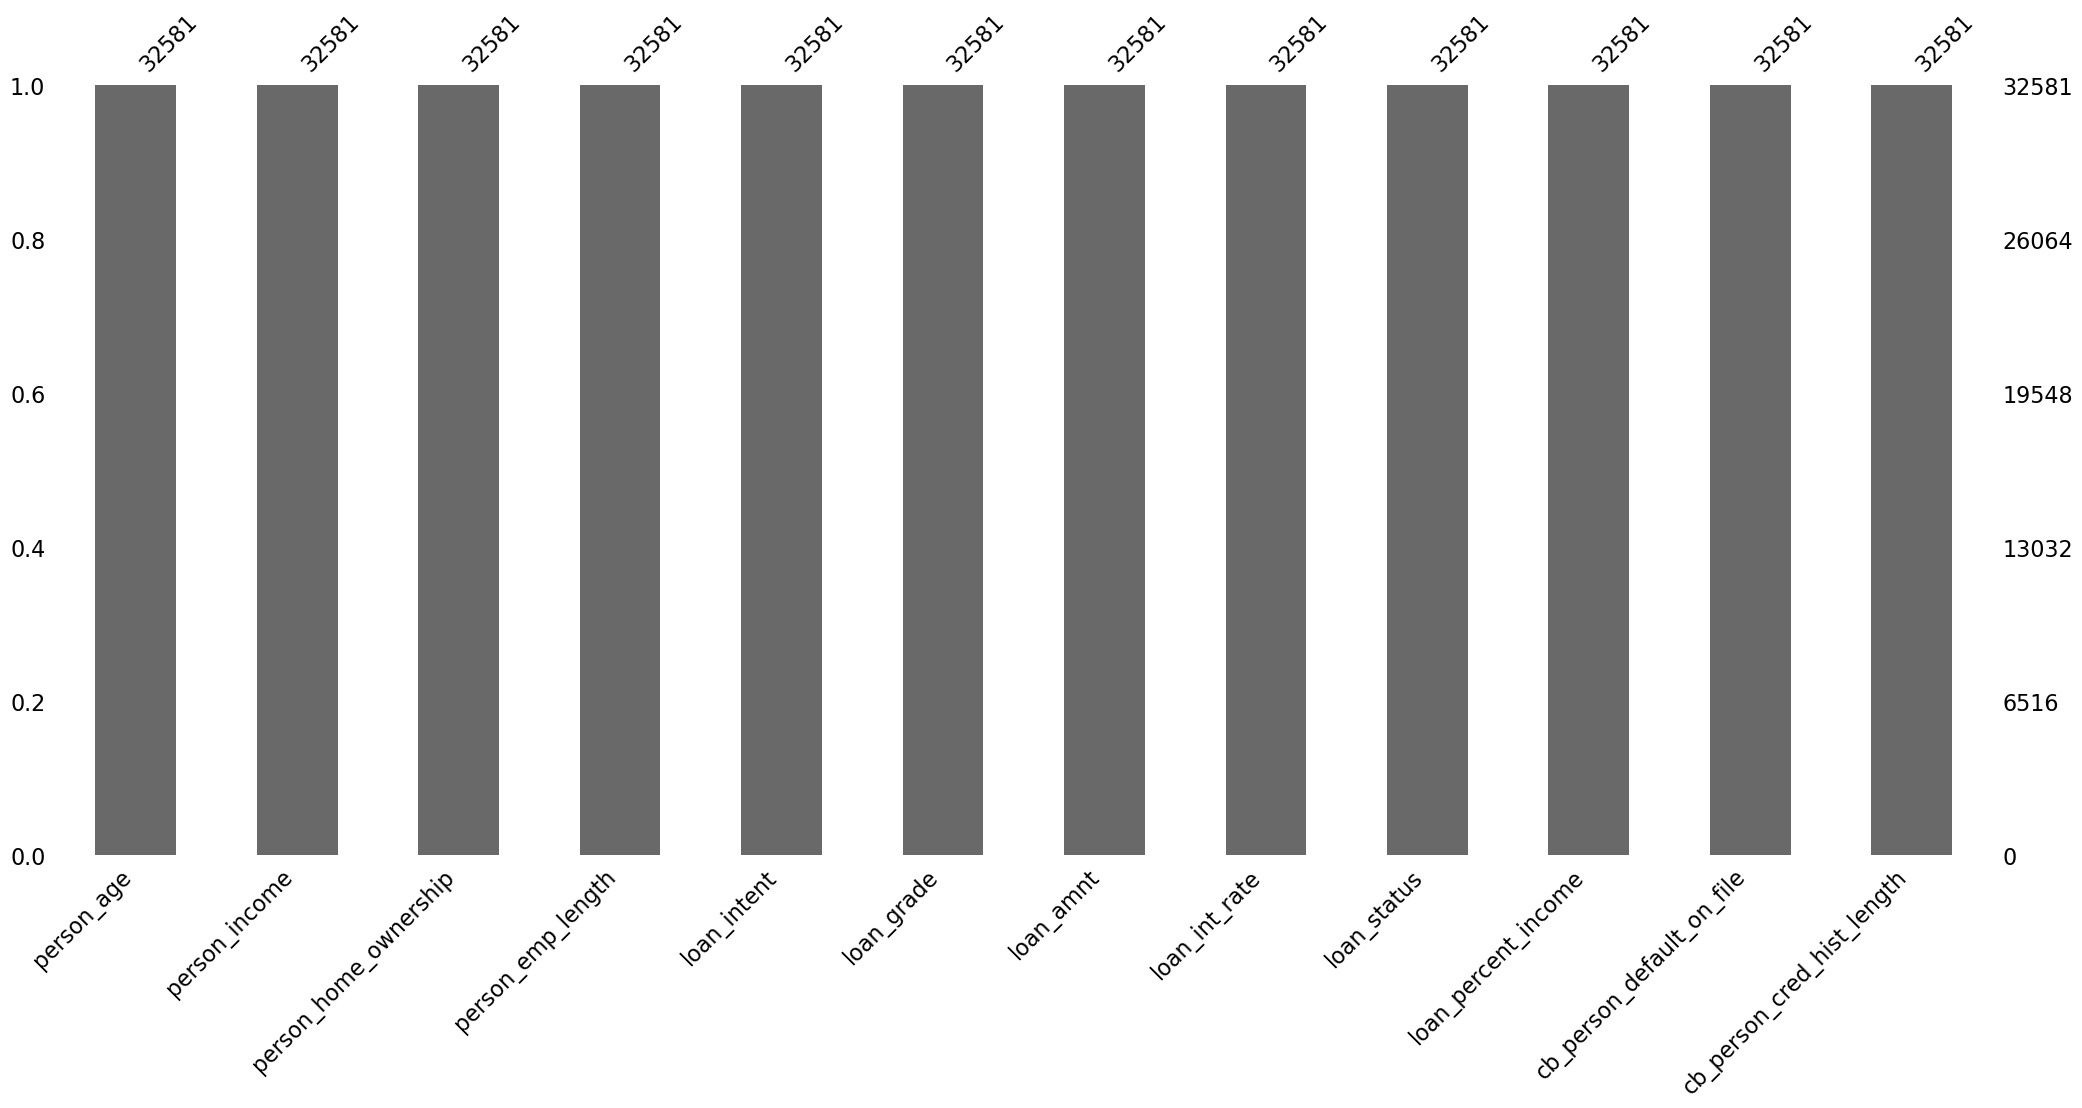

In [29]:
# Looks like there's no missing values anymore and we can save the data
data.isnull().sum()
msno.bar(data)
data.to_csv("../data/processed/credit_risk_dataset.csv", index=False)
create_db = sqlite3.connect('../data/sql/credit_risk_dataset.db')
data.to_sql('credit_risk_dataset', create_db, if_exists='replace', index=False)
create_db.close()